# semseg/train

based on [camvid.ipynb](./camvid.ipynb).

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

from abcli import fullname
from abcli import string
from abcli.modules import objects
from abcli.plugins import seed
from roofAI import NAME, VERSION
from roofAI.semseg.interface import train_model
from roofAI.semseg import Profile
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{NAME}-{VERSION}.{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
roofAI-3.75.1.abcli-7.2375.1-2023-06-aws-batch-a, built on 15 October 2023, 12:07:38


In [2]:
profile = Profile.VALIDATION # FULL, QUICK, VALIDATION
dataset_object = "roofAI-CamVid-v2"
model_object = objects.unique_object("roofAI-CamVid-semseg-model")

📂 roofAI-CamVid-semseg-model-2023-10-15-12-07-38-95647


SemSegModelTrainer: /Users/kamangir/storage/abcli/roofAI-CamVid-v2/SegNet-Tutorial/CamVid/ -Profile.VALIDATION-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-15-12-07-38-95647


Dataset: 1 item(s).


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-15-12-07-38-95647/dataset.png


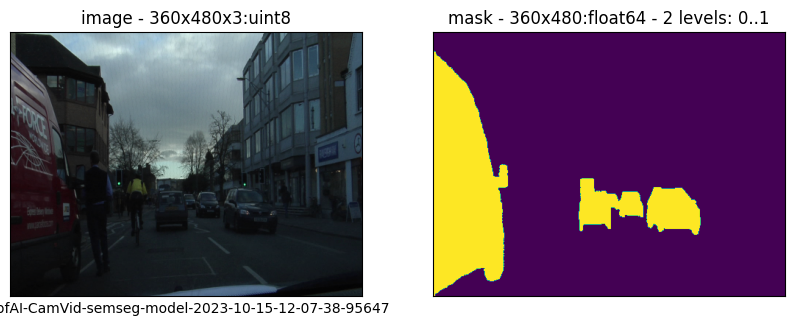

/usr/local/lib/python3.11/site-packages/albumentations/imgaug/transforms.py:261: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)
/usr/local/lib/python3.11/site-packages/albumentations/imgaug/transforms.py:384: FutureWarning: This IAAPerspective is deprecated. Please use Perspective instead
  warnings.warn("This IAAPerspective is deprecated. Please use Perspective instead", FutureWarning)
/usr/local/lib/python3.11/site-packages/albumentations/augmentations/transforms.py:1258: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/usr/local/lib/python3.11/site-packages/albumentations/imgaug/transforms.py:231: FutureWarning: IAASharpen is deprecated. Please use Sharpen instead
  warnings.warn("IAASharpen is deprecated. Please use Sharpen instead", FutureWarning)
/usr/local/lib/python3.11/site-packages/alb

Dataset: 1 item(s).


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-15-12-07-38-95647/augmented_dataset-00000.png


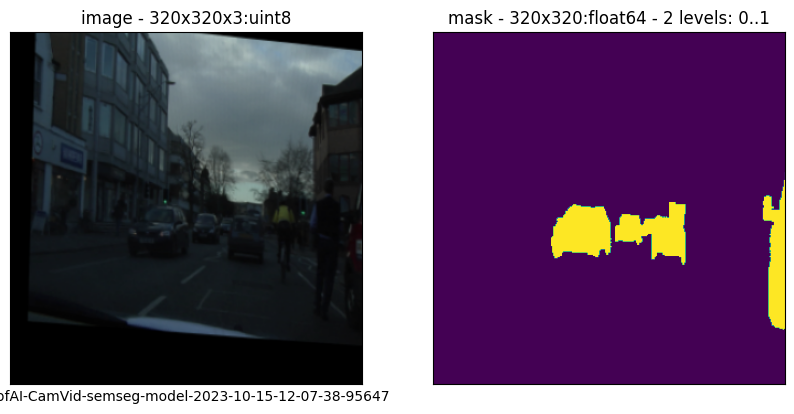

SemSegModelTrainer.train -cpu:sigmoid-> se_resnext50_32x4d[imagenet]: car
epoch: #1/1


Dataset: 1 item(s).
Dataset: 1 item(s).
valid: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s, dice_loss - 0.9865, iou_score - 0.006192]


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-15-12-07-38-95647/model.pth
SemSegModel.load(/Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-15-12-07-38-95647/model.pth): Profile.VALIDATION
SemSegModel: se_resnext50_32x4d[imagenet]-sigmoid-> car


Dataset: 1 item(s).
valid: 100%|██████████| 1/1 [00:00<00:00,  1.15it/s, dice_loss - 0.6204, iou_score - 0.2315]


In [3]:
train_model(
    dataset_path=objects.object_path(dataset_object),
    model_path=objects.object_path(model_object),
    in_notebook=True,
    profile=profile,
);

In [4]:
%%bash -s $profile $model_object
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

profile=$1
model_object=$2

abcli select $model_object
abcli tag set . built_by_notebook

if [[ "$profile" != Profile.VALIDATION ]] ; then
    abcli upload

    abcli cache write \
            latest_CamVid_model $model_object
    abcli tag set \
        $model_object \
        CamVid,semseg
fi


📂 abcli: roofAI-CamVid-semseg-model-2023-10-15-12-07-38-95647


roofAI-CamVid-semseg-model-2023-10-15-12-07-38-95647 += #built_by_notebook.


In [5]:
seed.log(model_object)

abcli select roofAI-CamVid-semseg-model-2023-10-15-12-07-38-95647; open .


In [6]:
# END